# MAT245 Lab 6

## Linear least squares regression - quick review 

Recall that in a linear least squares regression problem, we have a matrix $X$ whose rows represent, say, measurements from some sensors in an experiemnt. If we have a single sensor and conduct $m$ experiments, $X$ looks like:

$$
\begin{pmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_m
\end{pmatrix}
$$

For each of the $m$ experiments we have some observed output $y_i$, and we want to model this output as a linear function of the inputs. So if $\hat{y}$ denotes the output of our model, 

$$
  \hat{y}_i = \theta_0 + \theta_1 x_i.
$$

For a given choice $\theta = (\theta_0, \theta_1)$ of parameters, we can measure how "good" our predictions are by computing

$$
  \| \hat{y} - y \| = \| X\theta - y \|.
$$

One way of selecting a "good" choice of $\theta$ is to minimize the mean-squared error $\frac{1}{m} \| X \theta - y\|$. In other words, we want to find

$$
  \mathrm{argmin}_\theta \| X\theta - y\|.
$$


## The pseudo-inverse

The Moore-Penrose pseudo-inverse of an $m\times n$ matrix $X$ is the unique $n \times m$ matrix, usually denoted $X^+$, that satisfies

- $(X^+ X)^T = X^+ X$
- $(X X^+)^T = X X^+$
- $X^+ X X^+ = X^+$
- $XX^+ X = X$

It can be shown that if $X$ has the singular value decomposition

$$ X = U \Sigma V^T$$

then $X^+$ decomposes as

$$
X^+ = V \Sigma^+ U^T
$$

where $\Sigma^+ = \mathrm{diag}\left(\frac{1}{\sigma_1}, \dots, \frac{1}{\sigma_r}\right)$ is an $n\times m$ matrix. The pseudo-inverse is particularly useful because because it provides a solution to the least squares problem:

$$
X^+ b = \mathrm{argmin}_{x} \|X\theta - y\|.
$$

$X^+$ satisfies a convenient limit identity:

$$
X^+ = \lim_{\delta \downarrow 0} ~((X^T X + \delta^2 I)^{-1}X^T).
$$

This allows us to easily approximate $X^+$, since for small $\delta$ values, we have

$$
X^+ \approx (X^TX + \delta^2 I)^{-1}X^T.
$$

Let's use the pseudo-inverse approoach to do a least-squares regression on a couple subsets of the Boston data. To get started, we can plot median house price as a against each of the input variables to see which relationships might be amenable to linear regression analysis:

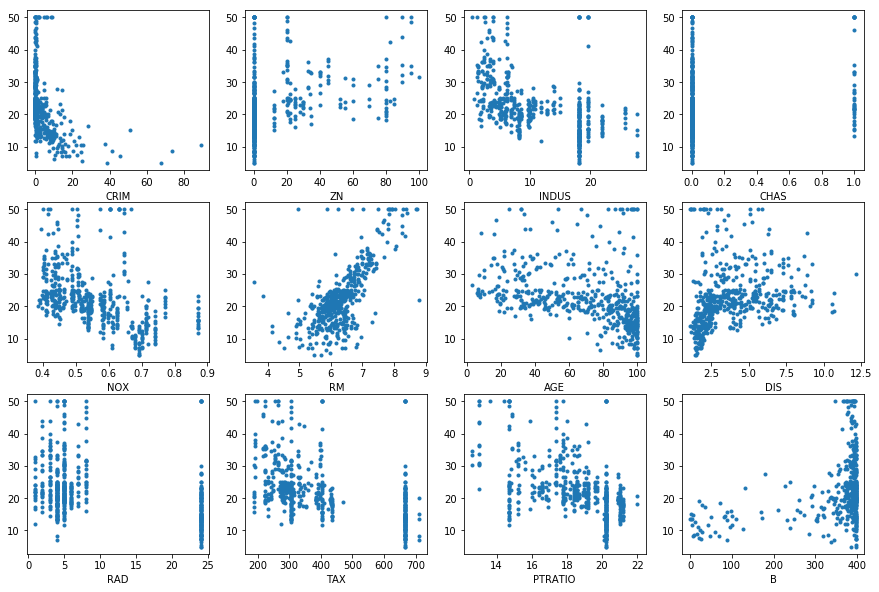

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

bost = datasets.load_boston()
fig = plt.figure(figsize=(15, 10))

for i in range(0, 12):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.set_xlabel(bost.feature_names[i])
    xs, ys = bost.data[:, i], bost.target
    plt.scatter(xs, ys, marker='.')
    
plt.show()

## Goals

- Use the plots above to choose a column of data from the boston dataset suitable for regression analysis.   
- Use the SVD formula to write a function that computes the pseudo-inverse $X^+$ of a 2D `numpy` array $X$.
- Solve the linear regression problem for your data (ie find $\theta$) using your pseudo-inverse implementation, and plot the resulting function against the data you chose. 
- Now write a function that takes $X$ and $\delta$ and returns the $\delta$-approximation to $X^+$ using the limit formula above. 
- Solve the linear regression problem again using your approximations for $\delta = 0.5, 0.1, 0.01$ and plot the results.  

## Validating your models.

When we train a model on some data, we'd like to have an idea of how well our model might generalize to new, unseen samples. Suppose our starting dataset has $m$ entries. The simplest approach to validation is to:

- Split these $m$ samples into two subsets: training and validation. A common choice is to do a random 70%/30% split between training/validation. 
- Train the model on the training set.
- Then compute the mean squared error between the known targets and our model's predictions on the validation set.

Now let's do a regression on the `sklearn` diabetes dataset, and use the simple validation procedure above to test generalizability of our model. First we plot the target variable, which represents how much a patient's diabetes has worsened in the past year, against each of the input variables. (See the `diab['DESCR']` field for more information on the individual inputs.)

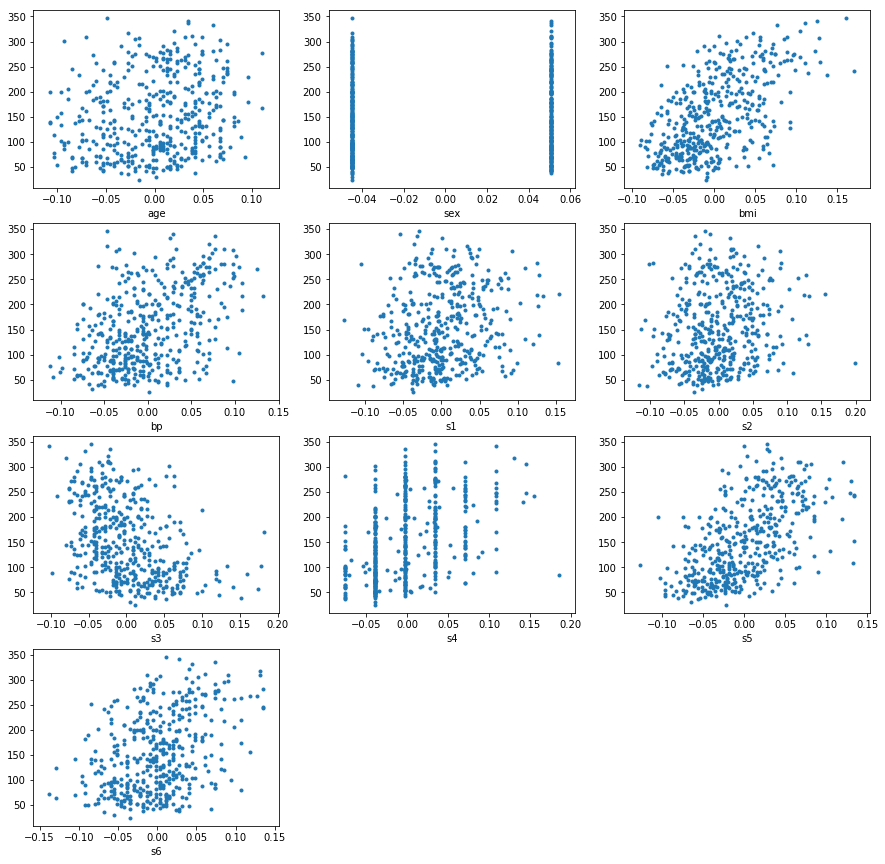

In [18]:
diab = datasets.load_diabetes()

fig = plt.figure(figsize=(15, 15))

for i in range(0, 10):
    ax = fig.add_subplot(4, 3, i + 1)
    ax.set_xlabel(diab['feature_names'][i])
    xs, ys = diab.data[:, i], diab.target
    plt.scatter(xs, ys, marker='.')
    
plt.show()

## Goals:

- Use the plots above to choose a column from the diabetes dataset that looks amendable to a linear regression analysis. 
- Once you've chosen your target column, do a 70/30 split on the inputs and targets to divide it into training and test sets. Make sure the input and target rows match. (The `sklearn.model_selection` library might come in handy for this task, particularly the `train_test_split` function.)
- Use you SVD based pseudo-inverse function from part 1 to train a linear least squares model on the training data. 
- Use your trained model to generate predictions on the validation set. Compute the mean-squared error compared to the true targets. (The `sklearn.metrics` library might be useful here.)
- Repeat the last two steps with a $\delta$-approximation to the pseudo-inverse. How does the validation error compare?